# This notebook include 4 main section:
- Use K-Nearest-neighbor
- Use Decision-Trees
    * with criterion="entropy"
    * with criterion="gini"
    * with criterion="log_loss"
- Use Logistic-Regression
    * with solver='liblinear'
    * with solver='newton-cg'
    * with solver='lbfgs'
    * with solver='sag'
    * with solver='saga'
- Use Support Vector Machine (SVM)
    * with kernel='rbf'
    * with kernel='linear'
    * with kernel='poly'

### Importing needed library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, jaccard_score, classification_report, confusion_matrix, confusion_matrix, log_loss
import itertools


### Load Data From CSV File

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Check type of columns

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### Check NaN exist in columns

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Show names of columns

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### Show count of values in specific columns

In [6]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

### Show number of rows and columns in database

In [7]:
df.shape

(303, 14)

### Shows rows number in specific column which are noise values.

In [8]:
caa_del = []
for i, j in df.caa.iteritems():
    if j == 4:
        caa_del.append(i)
caa_del

[92, 158, 163, 164, 251]

### Covert noise values to NaN for easy delete

In [9]:
for i in caa_del:
    df.caa[i] = np.NaN

C:\Users\sinad\AppData\Local\Temp\ipykernel_11372\2276076771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.caa[i] = np.NaN


### Delete NaN values in database

In [10]:
df = df.dropna()

### Convert type of df.caa from float to int

In [11]:
df['caa'] = np.int64(df['caa'])

### **Now data are ready for work on them.**

## 1- Use K-Nearest-neighbors

explore data by using visualization techniques:

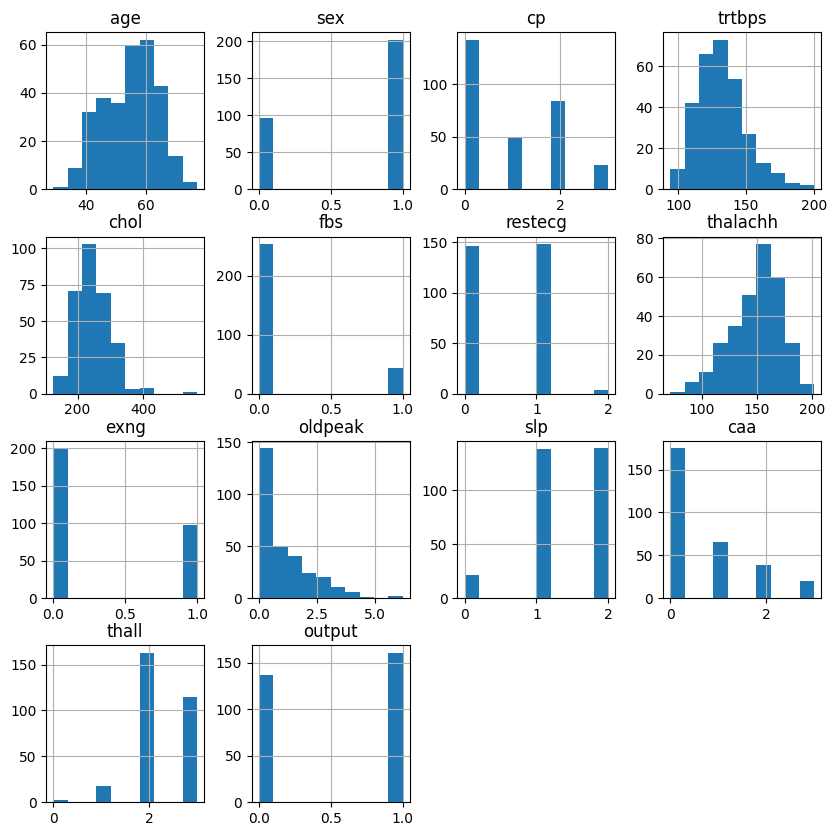

In [12]:
hist = df.hist(figsize=[10, 10])

Show columns name for define feature sets

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Define feature sets, X:

In [14]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

Define feature sets, y:

In [15]:
y = df[['output']].values
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

Normalize data

In [16]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[:5]

array([[ 0.94171851,  0.68938199,  1.97656958,  0.76075684, -0.26842552,
         2.40265005, -0.99591602,  0.0232535 , -0.7       ,  1.0709197 ,
        -2.26421593, -0.72013413, -2.14045037],
       [-1.9422479 ,  0.68938199,  1.00779041, -0.08960152,  0.05972209,
        -0.4162071 ,  0.90653894,  1.6357888 , -0.7       ,  2.10343758,
        -2.26421593, -0.72013413, -0.50910968],
       [-1.49856076, -1.4505746 ,  0.03901124, -0.08960152, -0.82820673,
        -0.4162071 , -0.99591602,  0.98205827, -0.7       ,  0.29653128,
         0.97970882, -0.72013413, -0.50910968],
       [ 0.16526602,  0.68938199,  0.03901124, -0.65650709, -0.21051712,
        -0.4162071 ,  0.90653894,  1.24355048, -0.7       , -0.21972766,
         0.97970882, -0.72013413, -0.50910968],
       [ 0.2761878 , -1.4505746 , -0.92976793, -0.65650709,  2.06721332,
        -0.4162071 ,  0.90653894,  0.58981996,  1.42857143, -0.39181397,
         0.97970882, -0.72013413, -0.50910968]])

Train Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print (f'Train set: {X_train.shape} {y_train.shape}')
print (f'Test set: {X_test.shape} {y_test.shape}')

Train set: (238, 13) (238, 1)
Test set: (60, 13) (60, 1)


Calculate the accuracy of KNN for different values of k

In [18]:
K = 11
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
print(mean_acc)

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: 

[0.8        0.75       0.76666667 0.78333333 0.8        0.78333333
 0.85       0.88333333 0.83333333 0.81666667]


c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: 

Plot the model accuracy for a different number of neighbors.

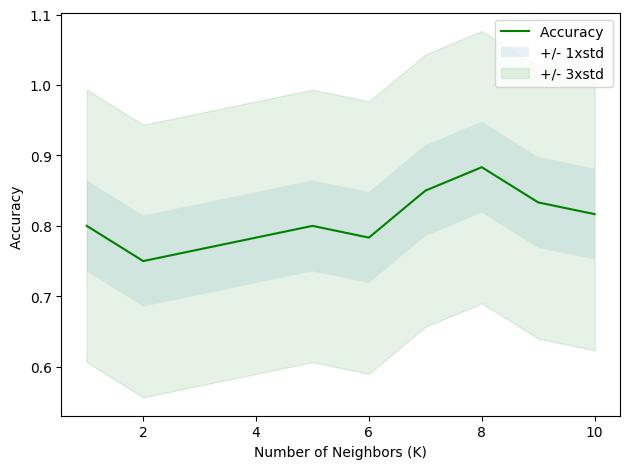

In [19]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Show the best accuracy with its k

In [20]:
print(f"The best accuracy was with {mean_acc.max()} with k= {mean_acc.argmax()+1}") 

The best accuracy was with 0.8833333333333333 with k= 8


## 2- Use Decision-Trees

### 2-1- with criterion="entropy"

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
heartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
heartTree.fit(X_train,y_train)
predTree = heartTree.predict(X_test)
print(f"DecisionTrees's Accuracy:  {metrics.accuracy_score(y_test, predTree)}")

DecisionTrees's Accuracy:  0.8222222222222222


### 2-2- with criterion="gini"

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
heartTree = DecisionTreeClassifier(criterion="gini", max_depth = 3)
heartTree.fit(X_train,y_train)
predTree = heartTree.predict(X_test)
print(f"DecisionTrees's Accuracy:  {metrics.accuracy_score(y_test, predTree)}")

DecisionTrees's Accuracy:  0.8166666666666667


### 2-3- with criterion="log_loss"

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
heartTree = DecisionTreeClassifier(criterion="log_loss", max_depth = 3)
heartTree.fit(X_train,y_train)
predTree = heartTree.predict(X_test)
print(f"DecisionTrees's Accuracy:  {metrics.accuracy_score(y_test, predTree)}")

DecisionTrees's Accuracy:  0.8166666666666667


## 3- Use Logistic-Regression
### 3-1- with solver='liblinear'

split dataset into train and test set:

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print (f'Train set: {X_train.shape} {y_train.shape}')
print (f'Test set: {X_test.shape} {y_test.shape}')

Train set: (238, 13) (238, 1)
Test set: (60, 13) (60, 1)


build model using **LogisticRegression**

In [25]:
LR = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
LR

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.0001, solver='liblinear')

predict using test set:

In [26]:
yhat = LR.predict(X_test)
print(yhat)
print(y_test)

[0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [27]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.50318747, 0.49681253],
       [0.49982893, 0.50017107],
       [0.50851021, 0.49148979],
       [0.50471331, 0.49528669],
       [0.4974175 , 0.5025825 ],
       [0.51326456, 0.48673544],
       [0.5084197 , 0.4915803 ],
       [0.49718465, 0.50281535],
       [0.48891536, 0.51108464],
       [0.49719508, 0.50280492],
       [0.4931561 , 0.5068439 ],
       [0.49752805, 0.50247195],
       [0.50031287, 0.49968713],
       [0.49567222, 0.50432778],
       [0.51047934, 0.48952066],
       [0.50147056, 0.49852944],
       [0.50450755, 0.49549245],
       [0.49673453, 0.50326547],
       [0.50020542, 0.49979458],
       [0.49457379, 0.50542621],
       [0.49734979, 0.50265021],
       [0.50699229, 0.49300771],
       [0.49937563, 0.50062437],
       [0.49843804, 0.50156196],
       [0.49314443, 0.50685557],
       [0.50375665, 0.49624335],
       [0.49629677, 0.50370323],
       [0.4936505 , 0.5063495 ],
       [0.49452218, 0.50547782],
       [0.50698956, 0.49301044],
       [0.

Try the jaccard index for accuracy evaluation

In [28]:
print(jaccard_score(y_test, yhat, pos_label = 1))
print(jaccard_score(y_test, yhat, pos_label = 0))

0.7857142857142857
0.6666666666666666


confusion matrix

In [29]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 6 18]]


Compute and Plot non-normalized confusion matrix

Confusion matrix, without normalization
[[33  3]
 [ 6 18]]


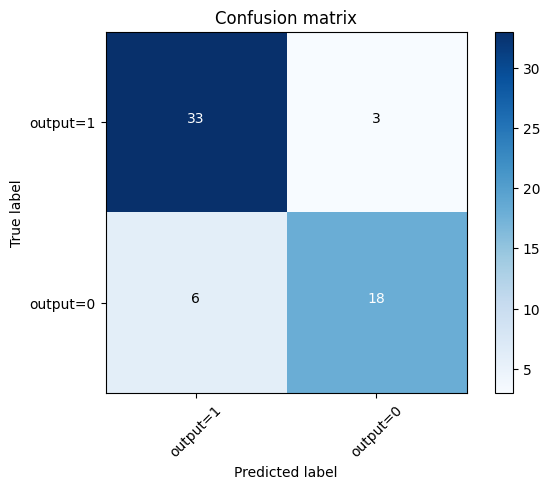

In [30]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [31]:
print(classification_report(y_test, yhat))
print(f' log_loss: {log_loss(y_test, yhat_prob)}')

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.85      0.92      0.88        36

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60

 log_loss: 0.6853450523741671


### 3-2- with solver='newton-cg'

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
LR = LogisticRegression(C=0.001, solver='newton-cg').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)


c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print(jaccard_score(y_test, yhat, pos_label = 1))
print(jaccard_score(y_test, yhat, pos_label = 0))

0.8297872340425532
0.6190476190476191


In [34]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39  1]
 [ 7 13]]


Confusion matrix, without normalization
[[39  1]
 [ 7 13]]


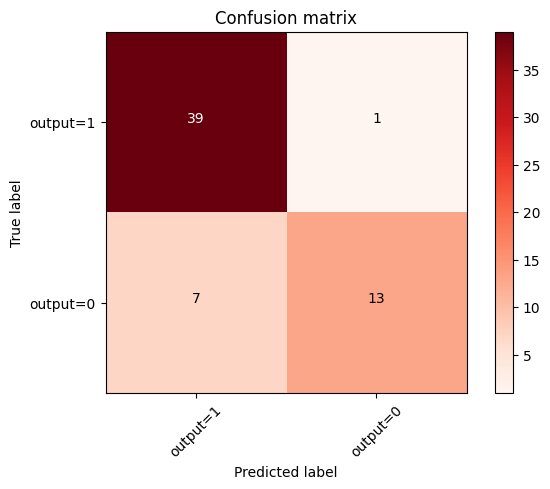

In [35]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [36]:
print(classification_report(y_test, yhat))
print(f' log_loss: {log_loss(y_test, yhat_prob)}')

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.85      0.97      0.91        40

    accuracy                           0.87        60
   macro avg       0.89      0.81      0.84        60
weighted avg       0.87      0.87      0.86        60

 log_loss: 0.6224575393534395


### 3-3- with solver='lbfgs'

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)
LR = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(jaccard_score(y_test, yhat, pos_label = 1))
print(jaccard_score(y_test, yhat, pos_label = 0))

0.8297872340425532
0.6190476190476191


In [39]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39  1]
 [ 7 13]]


Confusion matrix, without normalization
[[39  1]
 [ 7 13]]


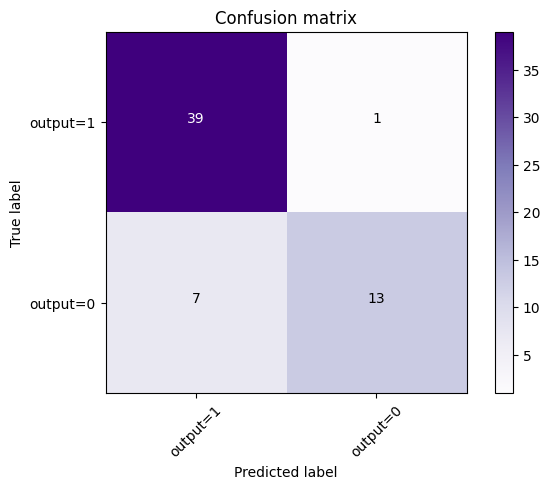

In [40]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [41]:
print(classification_report(y_test, yhat))
print(f' log_loss: {log_loss(y_test, yhat_prob)}')

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.85      0.97      0.91        40

    accuracy                           0.87        60
   macro avg       0.89      0.81      0.84        60
weighted avg       0.87      0.87      0.86        60

 log_loss: 0.6224569956604952


### 3-4- with solver='sag'

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
LR = LogisticRegression(C=0.001, solver='sag').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print(jaccard_score(y_test, yhat, pos_label = 1))
print(jaccard_score(y_test, yhat, pos_label = 0))

0.8297872340425532
0.6190476190476191


In [44]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39  1]
 [ 7 13]]


Confusion matrix, without normalization
[[39  1]
 [ 7 13]]


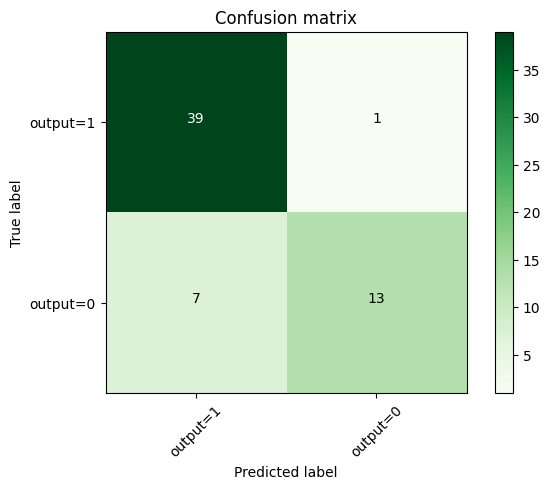

In [45]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [46]:
print(classification_report(y_test, yhat))
print(f' log_loss: {log_loss(y_test, yhat_prob)}')

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.85      0.97      0.91        40

    accuracy                           0.87        60
   macro avg       0.89      0.81      0.84        60
weighted avg       0.87      0.87      0.86        60

 log_loss: 0.622458790224842


### 3-5- with solver='saga'

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
LR = LogisticRegression(C=0.001, solver='saga').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(jaccard_score(y_test, yhat, pos_label = 1))
print(jaccard_score(y_test, yhat, pos_label = 0))

0.8297872340425532
0.6190476190476191


In [49]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39  1]
 [ 7 13]]


Confusion matrix, without normalization
[[39  1]
 [ 7 13]]


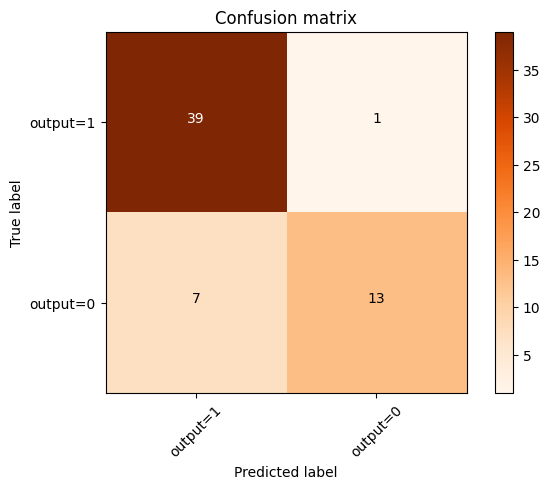

In [50]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [51]:
print(classification_report(y_test, yhat))
print(f' log_loss: {log_loss(y_test, yhat_prob)}')

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.85      0.97      0.91        40

    accuracy                           0.87        60
   macro avg       0.89      0.81      0.84        60
weighted avg       0.87      0.87      0.86        60

 log_loss: 0.6224480142205905


## 4- Use Support Vector Machine (SVM)
### 4-1- with kernel='rbf'

Look at the distribution of the outputs based on Chest Pain types and maximum heart rate achieved:

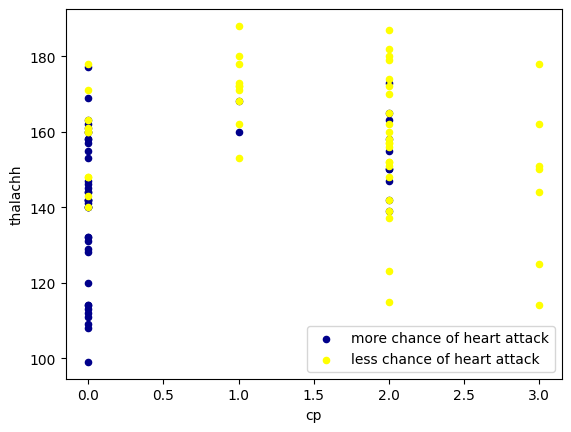

In [52]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='cp', y='thalachh', color='DarkBlue', label='more chance of heart attack');
df[df['output'] == 1][0:50].plot(kind='scatter', x='cp', y='thalachh', color='Yellow', label='less chance of heart attack', ax=ax);
plt.show()

In [53]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
        'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [54]:
y = df[['output']].values
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

Split dataset into train and test set:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (238, 13) (238, 1)
Test set: (60, 13) (60, 1)


Modeling SVM

In [56]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Model used to predict new values:

In [57]:
yhat = clf.predict(X_test)
print(yhat [0:5])
print(y_test[:5])

[1 1 1 1 1]
[[0]
 [0]
 [0]
 [0]
 [1]]


Try the jaccard index for accuracy:

In [58]:
print(jaccard_score(y_test, yhat,pos_label=0))
print(jaccard_score(y_test, yhat,pos_label=1))

0.42857142857142855
0.6666666666666666


Confusion matrix

In [59]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Compute and Plot non-normalized confusion matrix

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        24
           1       0.73      0.89      0.80        36

    accuracy                           0.73        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.74      0.73      0.72        60

Confusion matrix, without normalization
[[12 12]
 [ 4 32]]


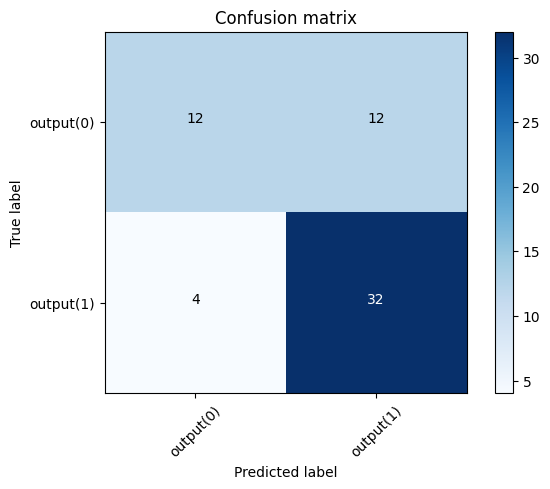

In [60]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output(0)','output(1)'],normalize= False,  title='Confusion matrix')

### 4-2- with kernel='linear'

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [62]:
yhat = clf.predict(X_test)
print(jaccard_score(y_test, yhat,pos_label=0))
print(jaccard_score(y_test, yhat,pos_label=1))

0.7027027027027027
0.828125


In [63]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.96      0.72      0.83        36
           1       0.84      0.98      0.91        54

    accuracy                           0.88        90
   macro avg       0.90      0.85      0.87        90
weighted avg       0.89      0.88      0.87        90

Confusion matrix, without normalization
[[26 10]
 [ 1 53]]


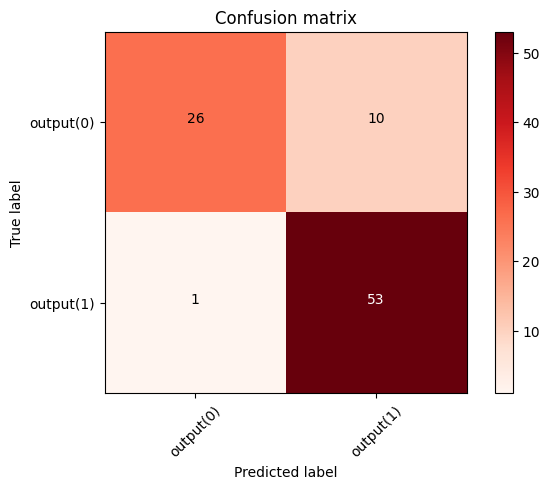

In [64]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output(0)','output(1)'],normalize= False,  title='Confusion matrix')

### 4-3- with kernel='poly'

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 

c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [66]:
yhat = clf.predict(X_test)
print(jaccard_score(y_test, yhat,pos_label=0))
print(jaccard_score(y_test, yhat,pos_label=1))

0.4791666666666667
0.6268656716417911


In [67]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.66      0.64      0.65        36
           1       0.76      0.78      0.77        54

    accuracy                           0.72        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.72      0.72      0.72        90

Confusion matrix, without normalization
[[23 13]
 [12 42]]


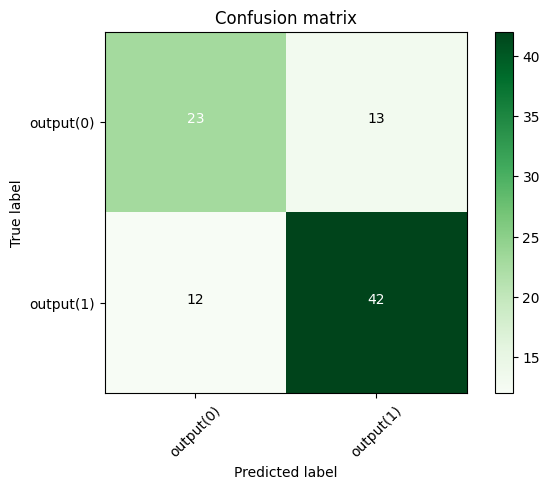

In [68]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output(0)','output(1)'],normalize= False,  title='Confusion matrix')